In [16]:
import pandas as pd
import numpy as np

# Загрузите данные из файла
df = pd.read_csv('data2.csv', sep=',')

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# Рассчитайте корреляцию между "Приоритет" и "Количество дней на выполнение"
correlation = df['Приоритет'].corr(df['Количество дней'])

# Выведите коэффициент корреляции
print(f"Корреляция между Приоритетом и Количеством дней на выполнение: {correlation:.2f}")


Корреляция между Приоритетом и Количеством дней на выполнение: -0.01


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Загрузите ваш DataFrame с данными
df = pd.read_csv('data2.csv', sep=';')

# Переименование столбцов
df = df.rename(columns={'Количество дней': 'Days', 'Статус': 'Status'})

# Проведем однофакторный дисперсионный анализ
formula = 'Days ~ C(Status)'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model, typ=2)

# Выведем результат ANOVA
print(anova_table)

                  sum_sq       df         F    PR(>F)
C(Status)     748.796922      9.0  1.112548  0.349547
Residual   845047.885748  11300.0       NaN       NaN


In [9]:
import pandas as pd

# Загрузите файл data.csv в DataFrame с разделителем ";"
df = pd.read_csv('data.csv', sep=';')

# Извлеките заголовки столбцов
column_headers = df.columns.tolist()

# Отобразите первые строки для оценки данных
df.head()

# Преобразование столбца "час(а,ов)" в числовой формат
df['час(а,ов)'] = df['час(а,ов)'].str.replace(',', '.').astype(float)

# Группировка данных по статусу и сумма времени выполнения
status_time = df.groupby('Статус')['час(а,ов)'].sum().reset_index()

# Округление времени выполнения в днях и часах
status_time['Дней'] = status_time['час(а,ов)'] // 24
status_time['Часов'] = status_time['час(а,ов)'] % 24

# Отобразите результат анализа
result_table = status_time[['Статус', 'Дней', 'Часов']]
result_table

,Статус,Дней,Часов
0,В очереди,18.0,12.00
1,В работе,112.0,11.00
2,Закрыта,417.0,12.50
3,Запрос информации,2.0,14.00
4,На тестировании,439.0,4.50
5,На тестировании у клиента,8.0,13.00
6,Новая,5.0,14.00
7,Отклонена,6.0,5.50
8,Приостановлено,83.0,6.00
9,Решена,1195.0,9.04


In [18]:
import pandas as pd

# Загрузите файл data4_updated.csv в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Преобразуйте столбцы "Плановая дата завершения", "Дата начала" и "Дата завершения" в формат даты
df['Плановый срок завершения'] = pd.to_datetime(df['Плановый срок завершения'], format='%Y-%m-%d')
df['Дата начала'] = pd.to_datetime(df['Дата начала'], format='%Y-%m-%d')
df['Дата завершения'] = pd.to_datetime(df['Дата завершения'], format='%Y-%m-%d')

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Отсортируйте пользователей по убыванию количества задач, завершенных в срок
user_completion_counts = user_completion_counts.sort_values(by='Завершено в срок', ascending=False)

# Выведите результат
print("Пользователи, чаще завершающие задачи в срок:")
print(user_completion_counts)


Пользователи, чаще завершающие задачи в срок:
        Пользователь  Завершено в срок
7   Буторина Татьяна               236
46  Руднев Александр               235
45   Розсохань Елена               205
25   Курбатова Софья               168
23  Костенко Алексей               163
..               ...               ...
28    Марченко Алена                 0
19      Илясов Макар                 0
33     Найденов Юрий                 0
53       Танцов Илья                 0
41  Портянкин Виктор                 0

[68 rows x 2 columns]


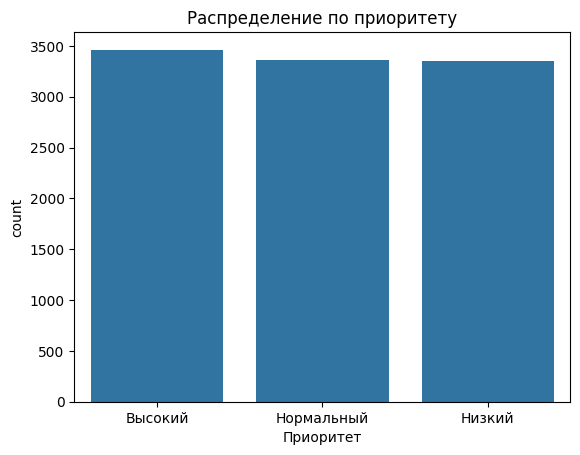

                            Завершено в срок
Пользователь    Приоритет                   
Артемова Ксения Высокий             0.313131
                Низкий              0.373626
                Нормальный          0.301075
Бердникова Анна Высокий             0.358025
                Низкий              0.282609
...                                      ...
Ярыгина Ирина   Низкий              0.357143
                Нормальный          0.342466
Яценко Кристина Высокий             0.500000
                Низкий              0.000000
                Нормальный          1.000000

[177 rows x 1 columns]


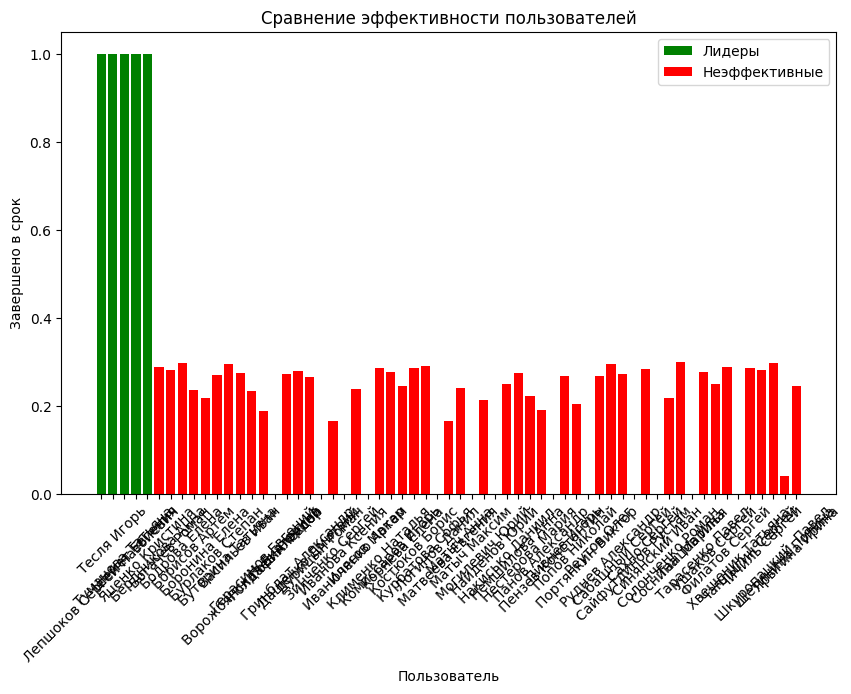

                  Завершено в срок  Приоритет
Завершено в срок          1.000000  -0.001711
Приоритет                -0.001711   1.000000


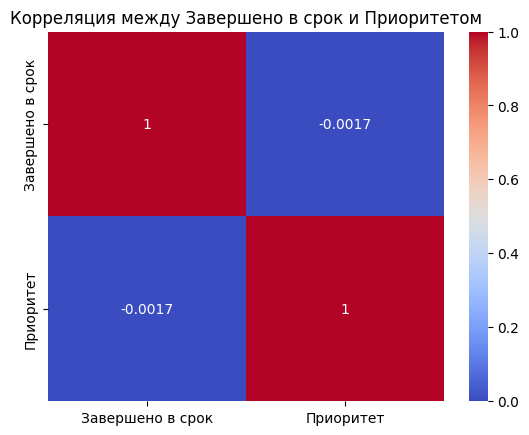

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузите файл с данными в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Проведите анализ данных
# 1. Постройте гистограмму или столбчатую диаграмму для приоритета
sns.countplot(x='Приоритет', data=df)
plt.title('Распределение по приоритету')
plt.show()

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Отсортируйте пользователей по убыванию количества задач, завершенных в срок
user_completion_counts = user_completion_counts.sort_values(by='Завершено в срок', ascending=False)

# 2. Постройте сводную таблицу, показывающую связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет'], aggfunc='mean')
print(pivot_table)

# Фильтрация пользователей
selected_users = pivot_table[(pivot_table > 0.7) | (pivot_table < 0.3)].reset_index()

# Разделение на лидеров и неэффективных
leaders = selected_users[selected_users['Завершено в срок'] > 0.7]
inefficient = selected_users[selected_users['Завершено в срок'] < 0.3]

# Постройка столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(leaders['Пользователь'], leaders['Завершено в срок'], label='Лидеры', color='g')
plt.bar(inefficient['Пользователь'], inefficient['Завершено в срок'], label='Неэффективные', color='r')
plt.xlabel("Пользователь")
plt.ylabel("Завершено в срок")
plt.title("Сравнение эффективности пользователей")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# 3. Постройте корреляционную матрицу, чтобы оценить корреляцию между переменными
correlation_matrix = df[['Завершено в срок', 'Приоритет']].corr()
print(correlation_matrix)

# 4. Постройте тепловую карту для корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между Завершено в срок и Приоритетом')
plt.show()


In [36]:
import pandas as pd

# Загрузите данные из файлов
data_df = pd.read_csv('data2.csv', sep=';')
manager_survey_df = pd.read_csv('manager_survey_data.csv')

# Объедините данные по столбцу 'EmployeeID'
merged_df = data_df.merge(manager_survey_df, on='EmployeeID', how='inner')

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
merged_df['Завершено в срок'] = merged_df['Дата завершения'] <= merged_df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = merged_df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
merged_df['Приоритет'] = merged_df['Приоритет'].map(priority_mapping)
# Подсчет корреляции между столбцами
correlation = merged_df[['Завершено в срок', 'Приоритет', 'JobInvolvement']].corr()

# Вывод корреляции
print("Корреляция между Завершено в срок, Приоритет и JobInvolvement:")
print(correlation)

# Группировка и агрегация данных
grouped = merged_df.groupby(['Пользователь', 'Завершено в срок', 'Приоритет', 'JobInvolvement']).size().reset_index(name='Количество')

# Вывод сводной таблицы
print("Сводная таблица по Пользователь, Завершено в срок, Приоритет и JobInvolvement:")
print(grouped)



Корреляция между Завершено в срок, Приоритет и JobInvolvement:
                  Завершено в срок  Приоритет  JobInvolvement
Завершено в срок          1.000000  -0.001711       -0.007022
Приоритет                -0.001711   1.000000       -0.004988
JobInvolvement           -0.007022  -0.004988        1.000000
Сводная таблица по Пользователь, Завершено в срок, Приоритет и JobInvolvement:
        Пользователь  Завершено в срок  Приоритет  JobInvolvement  Количество
0    Артемова Ксения             False        1.0               3          68
1    Артемова Ксения             False        2.0               3          57
2    Артемова Ксения             False        3.0               3          65
3    Артемова Ксения              True        1.0               3          31
4    Артемова Ксения              True        2.0               3          34
..               ...               ...        ...             ...         ...
321    Ярыгина Ирина              True        3.0               

In [51]:
import pandas as pd
from scipy.stats import f_oneway

# Загрузите данные из файла
df = pd.read_csv('ourPerson.csv', sep=';')

# Замените числовые значения уровней вовлеченности на их текстовое представление
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['JobInvolvement'] = df['JobInvolvement'].map(level_mapping)

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']
# Разделите данные на группы в соответствии с уровнем вовлеченности
groups = [df[df['JobInvolvement'] == level]['Завершено в срок'] for level in level_mapping.values()]

# Проведите ANOVA анализ
f_statistic, p_value = f_oneway(*groups)

# Выведите результаты
print("Результаты ANOVA анализа:")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

# Оцените статистическую значимость различий
alpha = 0.05
if p_value < alpha:
    print("Существуют статистически значимые различия между уровнями вовлеченности.")
else:
    print("Нет статистически значимых различий между уровнями вовлеченности.")

# 2.Сводная таблица, показывающая связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет', 'JobInvolvement'], aggfunc='mean')
print(pivot_table)


Результаты ANOVA анализа:
F-статистика: 0.20085897274447911
p-значение: 0.8958397678977228
Нет статистически значимых различий между уровнями вовлеченности.
                                           Завершено в срок
Пользователь    Приоритет  JobInvolvement                  
Артемова Ксения Высокий    High                    0.333333
                           Low                     0.294118
                           Medium                  0.240000
                           Very High               0.421053
                Низкий     High                    0.370370
...                                                     ...
Яценко Кристина Высокий    Low                     0.000000
                           Medium                  1.000000
                Низкий     Medium                  0.000000
                Нормальный Low                     1.000000
                           Very High               1.000000

[611 rows x 1 columns]


                                           Завершено в срок
Пользователь    Приоритет  JobInvolvement                  
Артемова Ксения Высокий    High                    0.333333
                           Low                     0.294118
                           Medium                  0.240000
                           Very High               0.421053
                Низкий     High                    0.370370
...                                                     ...
Яценко Кристина Высокий    Low                     0.000000
                           Medium                  1.000000
                Низкий     Medium                  0.000000
                Нормальный Low                     1.000000
                           Very High               1.000000

[611 rows x 1 columns]


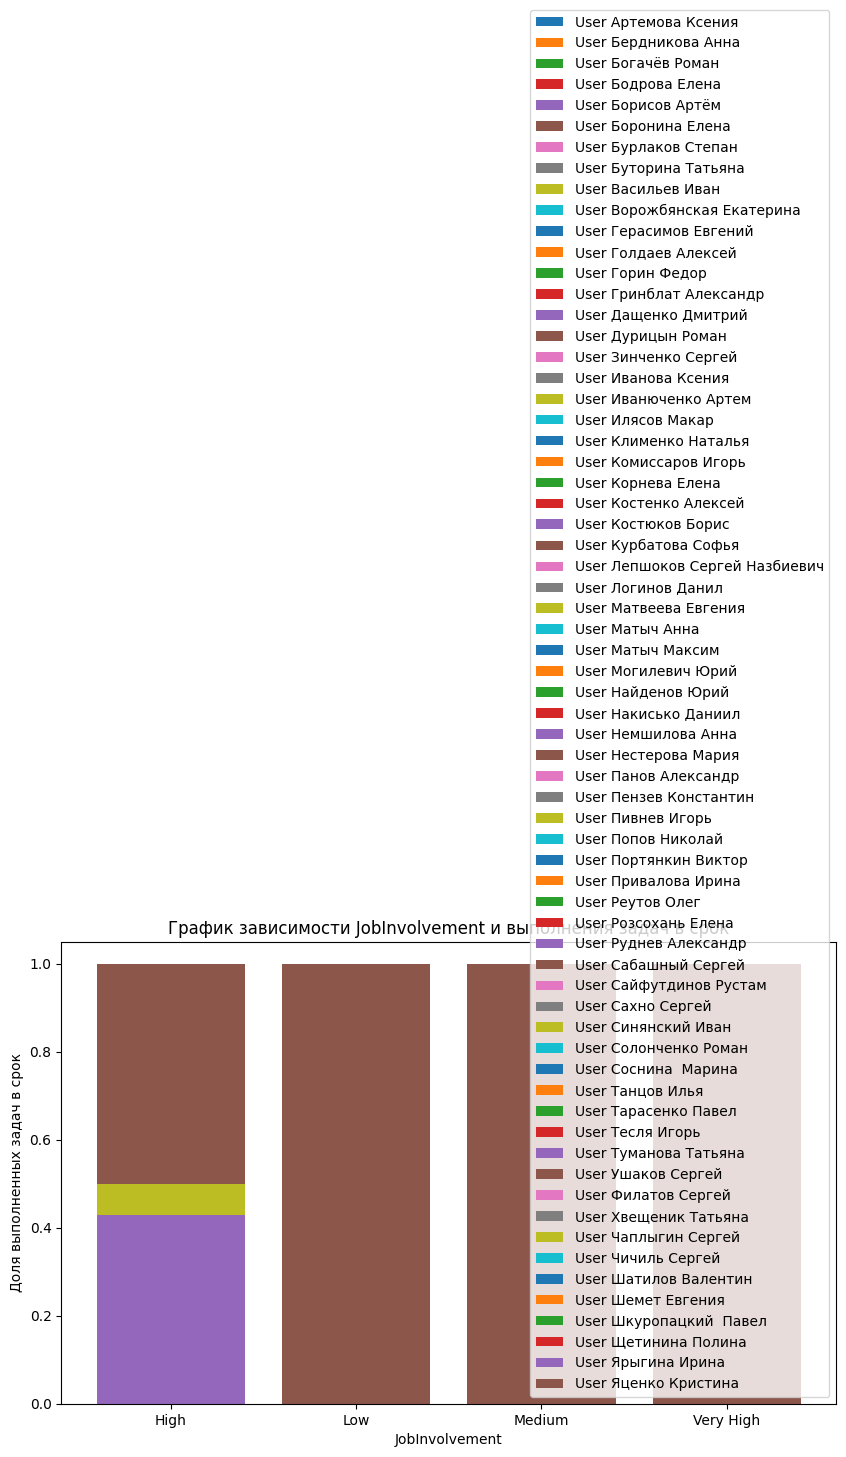

Пользователи в категории "Низкая": ['Артемова Ксения', 'Артемова Ксения', 'Артемова Ксения', 'Артемова Ксения', 'Артемова Ксения', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Бодрова Елена', 'Бодрова Елена', 'Бодрова Елена', 'Бодрова Елена', 'Бодрова Елена', 'Борисов Артём', 'Борисов Артём', 'Борисов Артём', 'Борисов Артём', 'Борисов Артём', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Буторина Татьяна', 'Буторина Татьяна', 'Буторина Татьяна', 'Буторина Татьяна', 'Буторина Татьяна', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Ворожбянская Екатерин

C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_4308\201553876.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()


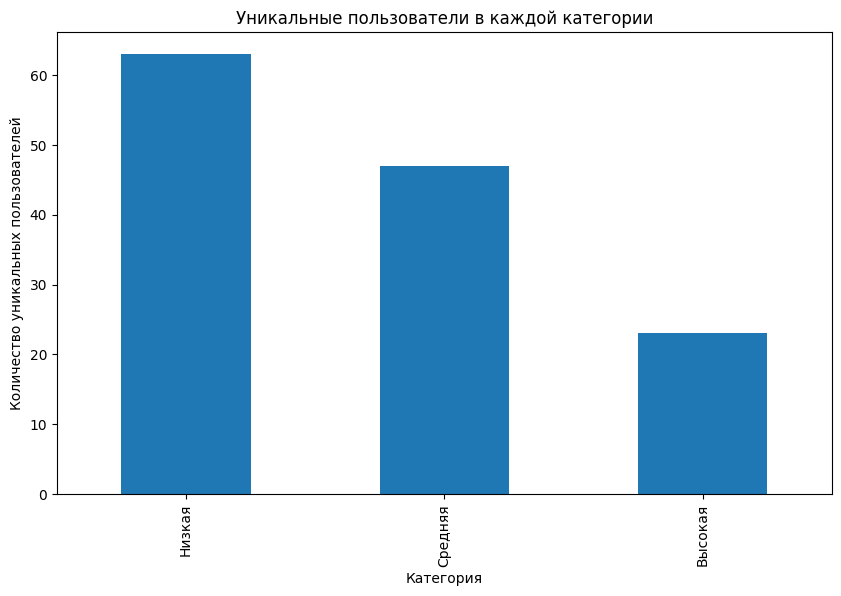

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Загрузите данные из файла
df = pd.read_csv('ourPerson.csv', sep=';')

# Замените числовые значения уровней вовлеченности на их текстовое представление
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['JobInvolvement'] = df['JobInvolvement'].map(level_mapping)

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']
# Разделите данные на группы в соответствии с уровнем вовлеченности
groups = [df[df['JobInvolvement'] == level]['Завершено в срок'] for level in level_mapping.values()]

# 2.Сводная таблица, показывающая связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет', 'JobInvolvement'], aggfunc='mean')
print(pivot_table)

pivot_table.reset_index(inplace=True)

user_grouped = pivot_table.groupby('Пользователь')

# Создайте фигуру и оси для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Переберите группы пользователей и постройте столбчатую диаграмму для каждой группы
for user, group_data in user_grouped:
    ax.bar(group_data['JobInvolvement'], group_data['Завершено в срок'], label=f'User {user}')

# Настройка меток и легенды
ax.set_xlabel('JobInvolvement')
ax.set_ylabel('Доля выполненных задач в срок')
ax.set_title('График зависимости JobInvolvement и выполнения задач в срок')
ax.legend()

# Показать график
plt.show()

# с разбивкой по категориям доли выполнения

bins = [0, 0.3, 0.7, 1.0]  # Границы категорий
labels = ["Низкая", "Средняя", "Высокая"]  # Названия категорий

pivot_table['Доля_категория'] = pd.cut(pivot_table['Завершено в срок'], bins=bins, labels=labels, include_lowest=True)

# Группировка по категориям
category_grouped = pivot_table.groupby('Доля_категория', observed=True)

# Вывод пользователей по категориям
for category, group_data in category_grouped:
    if not group_data['Пользователь'].empty:
        users = group_data['Пользователь'].tolist()
        print(f'Пользователи в категории "{category}": {users}')
unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()

# Постройте график
unique_users.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Количество уникальных пользователей')
plt.title('Уникальные пользователи в каждой категории')
plt.show()


                                           Завершено в срок
Пользователь    Приоритет  JobInvolvement                  
Артемова Ксения Высокий    High                    0.333333
                           Low                     0.294118
                           Medium                  0.240000
                           Very High               0.421053
                Низкий     High                    0.370370
...                                                     ...
Яценко Кристина Высокий    Low                     0.000000
                           Medium                  1.000000
                Низкий     Medium                  0.000000
                Нормальный Low                     1.000000
                           Very High               1.000000

[611 rows x 1 columns]


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_4308\293632472.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()


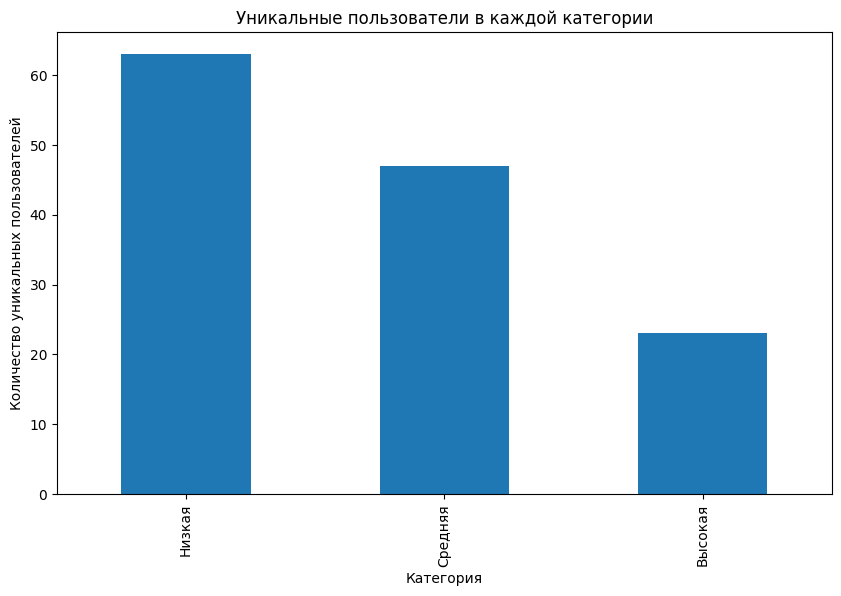

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Загрузите данные из файла
df = pd.read_csv('ourPerson.csv', sep=';')

# Замените числовые значения уровней вовлеченности на их текстовое представление
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['JobInvolvement'] = df['JobInvolvement'].map(level_mapping)

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']
# Разделите данные на группы в соответствии с уровнем вовлеченности
groups = [df[df['JobInvolvement'] == level]['Завершено в срок'] for level in level_mapping.values()]

# 2.Сводная таблица, показывающая связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет', 'JobInvolvement'], aggfunc='mean')
print(pivot_table)

pivot_table.reset_index(inplace=True)

user_grouped = pivot_table.groupby('Пользователь')

# с разбивкой по категориям доли выполнения

bins = [0, 0.3, 0.7, 1.0]  # Границы категорий
labels = ["Низкая", "Средняя", "Высокая"]  # Названия категорий

pivot_table['Доля_категория'] = pd.cut(pivot_table['Завершено в срок'], bins=bins, labels=labels, include_lowest=True)

# Группировка по категориям
category_grouped = pivot_table.groupby('Доля_категория', observed=True)

# Вывод пользователей по категориям
for category, group_data in category_grouped:
    if not group_data['Пользователь'].empty:
        users = group_data['Пользователь'].tolist()
        #print(f'Пользователи в категории "{category}": {users}')
unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()

# Постройте график
unique_users.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Количество уникальных пользователей')
plt.title('Уникальные пользователи в каждой категории')
plt.show()


In [99]:
import pandas as pd

# Загрузка данных из файла (замените 'timelog.csv' на фактический путь к вашему файлу)
df = pd.read_csv('timelog.csv', sep=',') 

# Выберите необходимые поля для группировки
group_by_fields = ['Задача', 'Номер Задачи', 'Деятельность', 'Направление']

# Группировка данных по выбранным полям и подсчет уникальных значений в поле 'Пользователь'
grouped_df = df.groupby(group_by_fields)['Пользователь'].nunique().reset_index(name='Количество_Пользователей')

# Сортировка по убыванию количества пользователей
grouped_df = grouped_df.sort_values(by='Количество_Пользователей', ascending=False)

# Вывод результата
result_df = grouped_df[['Номер Задачи', 'Деятельность', 'Направление','Количество_Пользователей']]

# Настройка отображения ширины столбцов
pd.options.display.max_colwidth = 50
pd.options.display.width = 120

# Вывод результата
print(result_df)

# Сохранение обновленного DataFrame в тот же файл
result_df.to_csv('concatIssueByUser.csv', index=False)

     Номер Задачи Деятельность                                   Направление  Количество_Пользователей
502          8688   Разработка            PP - Производственное планирование                         4
39           7375   Разработка  PM - Тех. обслуживание и ремонт оборудования                         3
351          7467   Разработка                                  FI - Финансы                         3
233          8741   Разработка                                  FI - Финансы                         2
418          7776   Разработка                              CO - Контроллинг                         2
..            ...          ...                                           ...                       ...
177          8103   Разработка     ISU - Энергетика и коммунальное хозяйство                         1
176          8095   Разработка     ISU - Энергетика и коммунальное хозяйство                         1
175          8092   Разработка     ISU - Энергетика и коммунальное хозяйс

        Деятельность Код Направления                                        Направление  Количество_Задач
0   Документирование             BI                               BI - Бизнес аналитика                 1
1   Документирование             CO                                    CO - Контроллинг                 1
2   Документирование            CRM      CRM - Управление взаимоотношениями с клиентами                 1
3   Документирование             FI                                        FI - Финансы                15
4   Документирование            HCM                         HCM - Управление персоналом                 1
5   Документирование            ISU           ISU - Энергетика и коммунальное хозяйство                12
6   Документирование             MM                         MM - Управление материалами                 9
7   Документирование             PM        PM - Тех. обслуживание и ремонт оборудования                14
8   Документирование             PP           

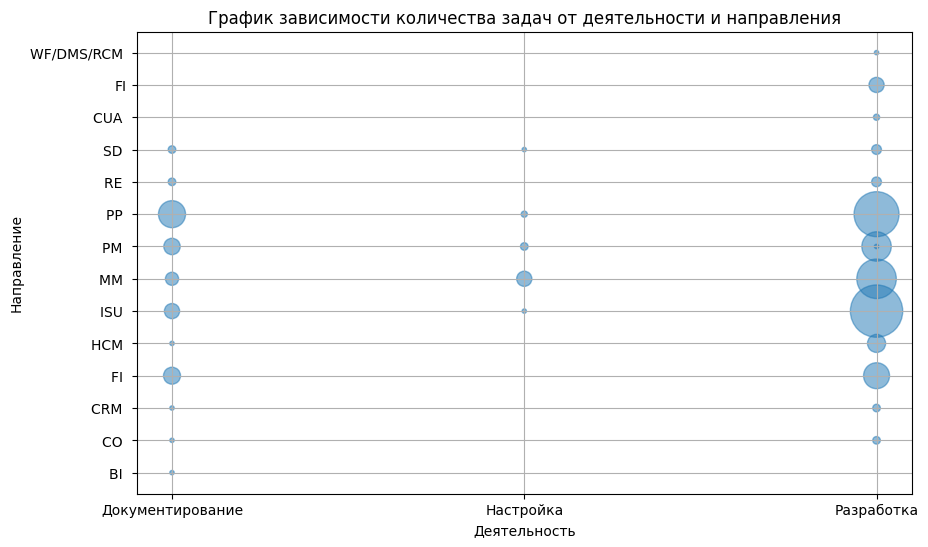

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла (замените 'timelog.csv' на фактический путь к вашему файлу)
df = pd.read_csv('timelog.csv', sep=',') 

# Выберите необходимые поля для второй группировки
group_by_fields_activity = ['Деятельность','Код Направления', 'Направление']

# Группировка данных по деятельности и направлению и подсчет уникальных задач
grouped_df_activity = grouped_df_users.groupby(group_by_fields_activity).size().reset_index(name='Количество_Задач')

# Сортировка по убыванию количества задач
grouped_df_activity = grouped_df_activity.sort_values(by='Количество_Задач', ascending=False)

# Сортировка по полям 'Деятельность' и 'Направление'
grouped_df_activity = grouped_df_activity.sort_values(by=['Деятельность', 'Направление'], ascending=[True, True])
# Вывод результата
result_df = grouped_df_activity[['Деятельность', 'Код Направления', 'Направление','Количество_Задач']]

# Настройка отображения ширины столбцов
pd.options.display.max_colwidth = 50
pd.options.display.width = 120




# Вывод результата
print(result_df)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(
    grouped_df_activity['Деятельность'],
    grouped_df_activity['Код Направления'],
    s=grouped_df_activity['Количество_Задач'] * 10,  # Размер маркера зависит от количества задач
    alpha=0.5
)

# Настройка графика
plt.title('График зависимости количества задач от деятельности и направления')
plt.xlabel('Деятельность')
plt.ylabel('Направление')
plt.grid(True)

# Отображение графика
plt.show()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла (замените 'timelog.csv' на фактический путь к вашему файлу)
df = pd.read_csv('timelog.csv', sep=',') 

# Выберите необходимые поля для группировки
group_by_fields_activity = ['Деятельность']

# Группировка данных по деятельности и подсчет уникальных задач
grouped_df_activity = grouped_df_users.groupby(group_by_fields_activity)['Задача'].nunique().reset_index(name='Количество_Уникальных_Задач')

# Сортировка по убыванию количества уникальных задач
grouped_df_activity = grouped_df_activity.sort_values(by='Количество_Уникальных_Задач', ascending=False)

# Вывод результата
result_df_activity = grouped_df_activity[['Деятельность', 'Количество_Уникальных_Задач']]

# Настройка отображения ширины столбцов
pd.options.display.max_colwidth = 50
pd.options.display.width = 120


# Вывод результата
print(result_df_activity)

       Деятельность  Количество_Уникальных_Задач
2        Разработка                          432
0  Документирование                           98
1         Настройка                           19


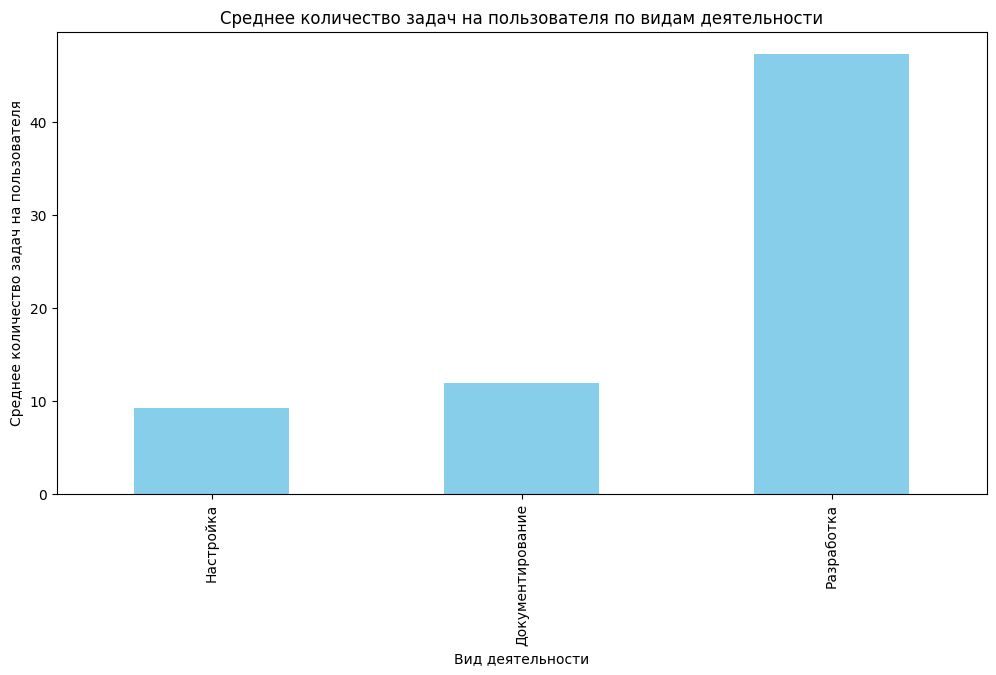

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
df = pd.read_csv('timelog.csv', sep=',') 

# Группировка данных по пользователям и виду деятельности
grouped_df = df.groupby(['Пользователь', 'Деятельность']).nunique()['Номер Задачи'].reset_index()

# Рассчет среднего количества задач на пользователя
avg_tasks_per_user = grouped_df.groupby('Деятельность')['Номер Задачи'].mean()

# Построение графика
plt.figure(figsize=(12, 6))
avg_tasks_per_user.sort_values().plot(kind='bar', color='skyblue')
plt.title('Среднее количество задач на пользователя по видам деятельности')
plt.xlabel('Вид деятельности')
plt.ylabel('Среднее количество задач на пользователя')
plt.show()


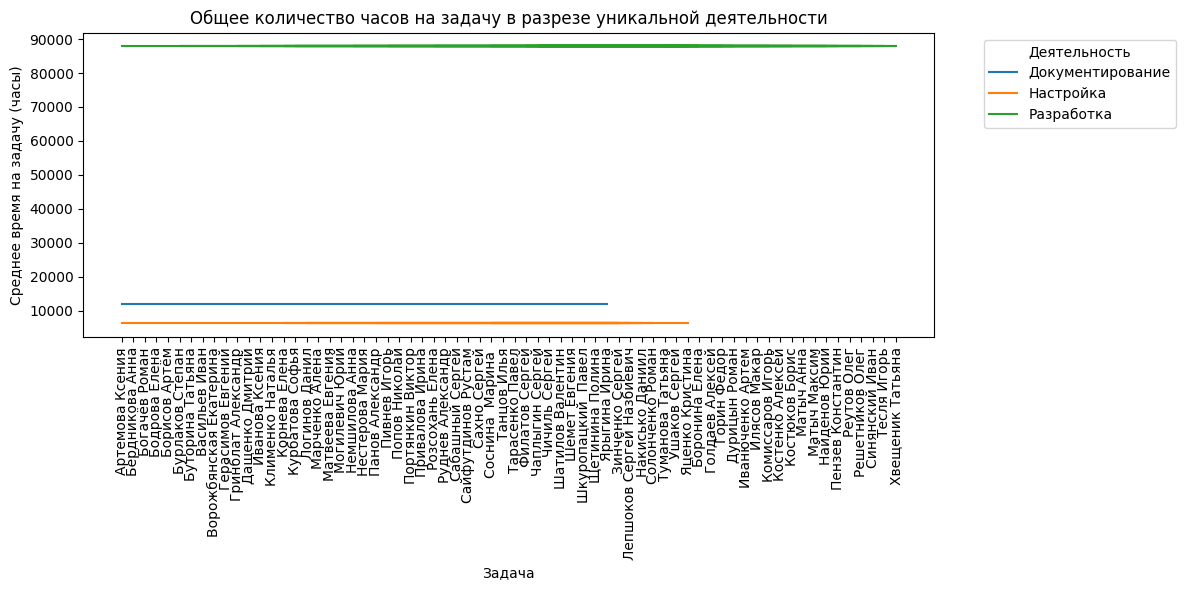

         Деятельность    Часы
0    Документирование     300
1    Документирование   61850
2    Документирование     300
3    Документирование   28250
4    Документирование    1000
..                ...     ...
121        Разработка  186800
122        Разработка  122750
123        Разработка   40830
124        Разработка  136900
125        Разработка     850

[126 rows x 2 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Преобразование типа данных в столбце "Час(а,ов)" с округлением
df_timelog['Часы'] = pd.to_numeric(df_timelog['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Группировка данных по деятельности и номеру задачи, суммирование часов
grouped_df = df_timelog.groupby(['Деятельность', 'Пользователь'])['Часы'].sum().reset_index()

# Рассчет общего количества часов на задачу в разрезе уникальной деятельности
grouped_df['Среднее_время_на_задачу'] = grouped_df.groupby('Деятельность')['Часы'].transform('mean')

# Построение графика
plt.figure(figsize=(12, 6))
for activity, data in grouped_df.groupby('Деятельность'):
    plt.plot(data['Пользователь'], data['Среднее_время_на_задачу'], label=activity)

plt.title('Общее количество часов на задачу в разрезе уникальной деятельности')
plt.xlabel('Задача')
plt.ylabel('Среднее время на задачу (часы)')
plt.legend(title='Деятельность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Вывод столбца с часами по каждой уникальной задаче
print(grouped_df[['Деятельность', 'Часы']])


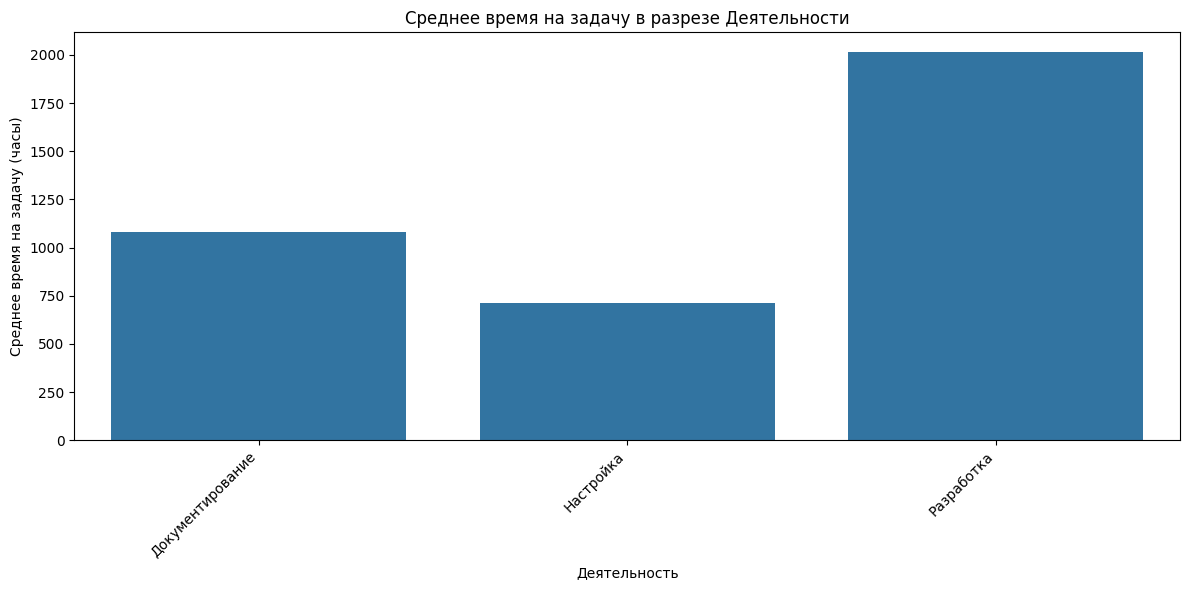

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Преобразование типа данных в столбце "час(а,ов)" с округлением
df_timelog['час(а,ов)'] = pd.to_numeric(df_timelog['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Группировка данных по уникальным задачам и блокам Деятельности, суммирование часов
grouped_df = df_timelog.groupby(['Деятельность', 'Номер Задачи'])['час(а,ов)'].sum().reset_index()

# Среднее время на задачу для каждого блока Деятельности
mean_time_per_activity = grouped_df.groupby('Деятельность')['час(а,ов)'].mean()

# Создание графика
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_time_per_activity.index, y=mean_time_per_activity.values)
plt.title('Среднее время на задачу в разрезе Деятельности')
plt.xlabel('Деятельность')
plt.ylabel('Среднее время на задачу (часы)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Сохранение графика в файл PNG
plt.savefig('график.png', dpi=300, bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


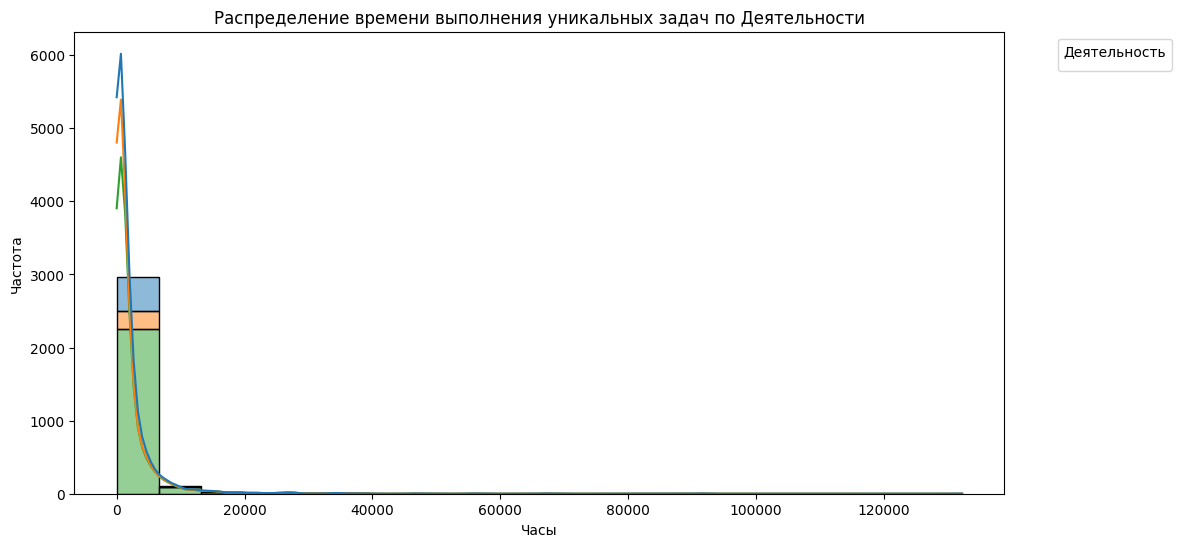

Характеристика времени выполнения задач по Деятельности:
Деятельность
Документирование    1079.583851
Настройка            710.121457
Разработка          2015.999583
Name: час(а,ов), dtype: float64
Деятельность
Документирование    200.0
Настройка           250.0
Разработка          800.0
Name: час(а,ов), dtype: float64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Преобразование типа данных в столбце "час(а,ов)" с округлением
df_timelog['час(а,ов)'] = pd.to_numeric(df_timelog['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Группировка данных по уникальным задачам и блокам Деятельности, суммирование часов
grouped_df = df_timelog.groupby(['Деятельность', 'Номер Задачи'])['час(а,ов)'].sum().reset_index()

# Создание графика
plt.figure(figsize=(12, 6))
sns.histplot(data=grouped_df, x='час(а,ов)', bins=20, kde=True, hue='Деятельность', multiple='stack')
plt.title('Распределение времени выполнения уникальных задач по Деятельности')
plt.xlabel('Часы')
plt.ylabel('Частота')
plt.legend(title='Деятельность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Характеристика итогового результата
mean_hours = grouped_df.groupby('Деятельность')['час(а,ов)'].mean()
median_hours = grouped_df.groupby('Деятельность')['час(а,ов)'].median()
print("Характеристика времени выполнения задач по Деятельности:")
print(mean_hours)
print(median_hours)



Характеристика времени выполнения задач по Деятельности:
Деятельность
Документирование    1079.583851
Настройка            710.121457
Разработка          2015.999583
Name: час(а,ов), dtype: float64
Деятельность
Документирование    200.0
Настройка           250.0
Разработка          800.0
Name: час(а,ов), dtype: float64


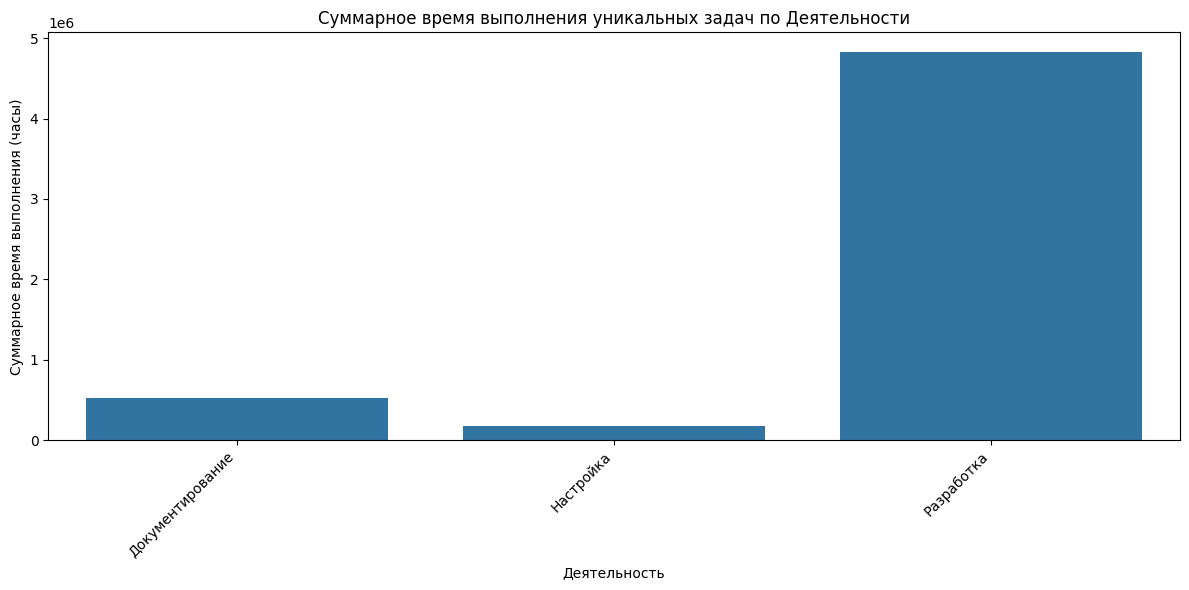

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Преобразование типа данных в столбце "час(а,ов)" с округлением
df_timelog['час(а,ов)'] = pd.to_numeric(df_timelog['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Группировка данных по уникальным задачам и блокам Деятельности, суммирование часов
grouped_df = df_timelog.groupby(['Деятельность', 'Номер Задачи']).agg({'час(а,ов)': 'sum'}).reset_index()

# Создание графика
plt.figure(figsize=(12, 6))
sns.barplot(x='Деятельность', y='час(а,ов)', data=grouped_df, estimator=sum, errorbar=None)
plt.title('Суммарное время выполнения уникальных задач по Деятельности')
plt.xlabel('Деятельность')
plt.ylabel('Суммарное время выполнения (часы)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Характеристика итогового результата
mean_hours = grouped_df.groupby('Деятельность')['час(а,ов)'].mean()
median_hours = grouped_df.groupby('Деятельность')['час(а,ов)'].median()
print("Характеристика времени выполнения задач по Деятельности:")
print(mean_hours)
print(median_hours)

# Сохранение графика в файл PNG
plt.savefig('график.png', dpi=300, bbox_inches='tight')


Характеристика времени выполнения задач по Деятельности в 2020 году:
Деятельность
Настройка    400.0
Name: час(а,ов), dtype: float64
Деятельность
Настройка    400.0
Name: час(а,ов), dtype: float64
Характеристика времени выполнения задач по Деятельности в 2021 году:
Деятельность
Документирование     545.298246
Настройка            671.428571
Разработка          1992.098501
Name: час(а,ов), dtype: float64
Деятельность
Документирование    300.0
Настройка           600.0
Разработка          800.0
Name: час(а,ов), dtype: float64
Характеристика времени выполнения задач по Деятельности в 2022 году:
Деятельность
Документирование     970.945860
Настройка            787.500000
Разработка          2361.933462
Name: час(а,ов), dtype: float64
Деятельность
Документирование    200.0
Настройка           250.0
Разработка          800.0
Name: час(а,ов), dtype: float64
Характеристика времени выполнения задач по Деятельности в 2023 году:
Деятельность
Документирование    1571.864407
Настройка            68

<Figure size 640x480 with 0 Axes>

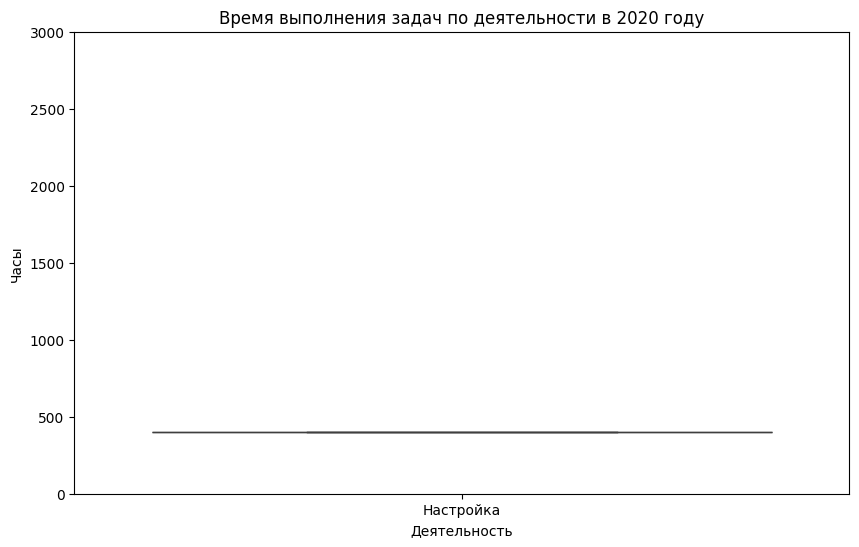

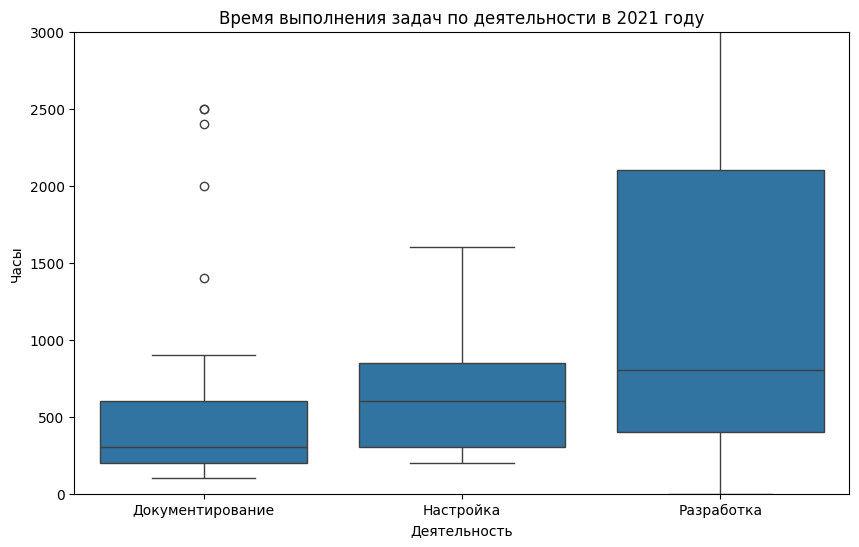

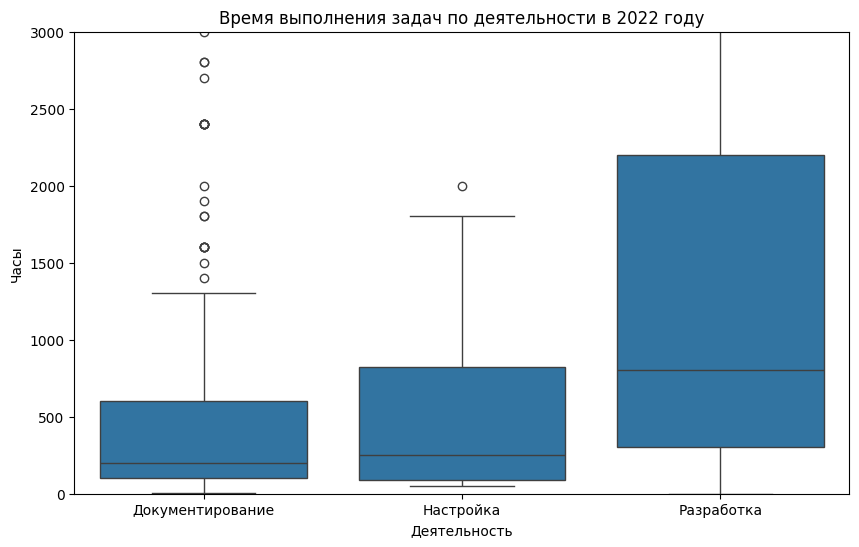

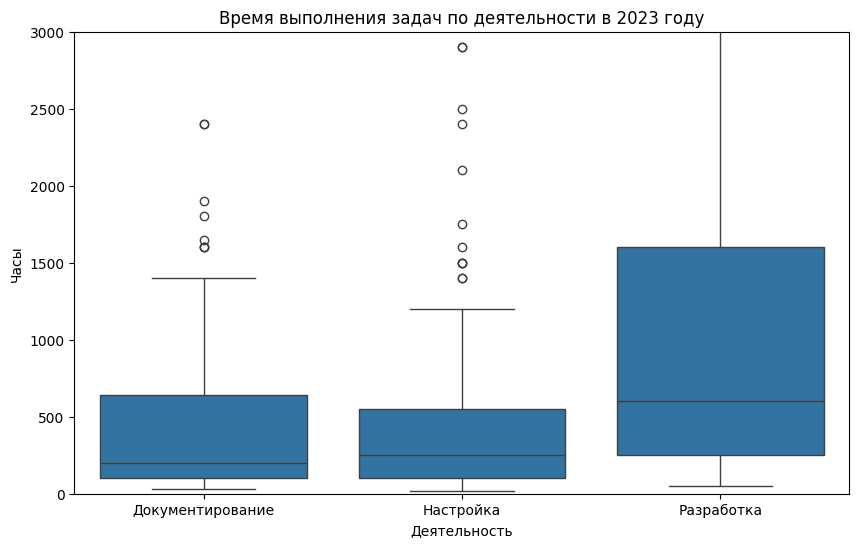

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Преобразование типа данных в столбце "час(а,ов)" с округлением
df_timelog['час(а,ов)'] = pd.to_numeric(df_timelog['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Преобразование столбца с датой в тип datetime с указанием формата
df_timelog['Дата'] = pd.to_datetime(df_timelog['Дата'], format='%d.%m.%Y')

# Добавление столбца "Год"
df_timelog['Год'] = df_timelog['Дата'].dt.year

# Группировка данных по уникальным задачам, блокам Деятельности и Году, суммирование часов
grouped_df = df_timelog.groupby(['Деятельность', 'Номер Задачи', 'Год']).agg({'час(а,ов)': 'sum'}).reset_index()

# Создание графика boxplot
#g = sns.FacetGrid(grouped_df, col='Год', col_wrap=2, height=8, sharey=False, palette='dark:#1f77b4')
#g.map_dataframe(sns.boxplot, x='Деятельность', y='час(а,ов)', hue='Деятельность')
#g.set_axis_labels('Деятельность', 'Часы')
#g.set_titles(col_template='{col_name} год')
#g.add_legend(title='Деятельность', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ограничение по часам
g.set(ylim=(0, 3000))
plt.tight_layout()

# Характеристика итогового результата
for year, data in grouped_df.groupby('Год'):
    mean_hours = data.groupby('Деятельность')['час(а,ов)'].mean()
    median_hours = data.groupby('Деятельность')['час(а,ов)'].median()
    print(f"Характеристика времени выполнения задач по Деятельности в {year} году:")
    print(mean_hours)
    print(median_hours)

# Сохранение графика в файл PNG plt.show()
#plt.savefig('график_boxplot_by_year.png', dpi=300, bbox_inches='tight')

# Создание графиков с усами для каждого года и деятельности
for year in sorted(grouped_df['Год'].unique()):
    plt.figure(figsize=(10, 6))
    
    # Фильтрация данных по году
    data_year = grouped_df[grouped_df['Год'] == year]
    
    # Создание графика с усами
    sns.boxplot(x='Деятельность', y='час(а,ов)', data=data_year)
    
    # Добавление ограничения по часам (3000 часов)
    plt.ylim(0, 3000)
    
    # Добавление заголовка и меток осей
    plt.title(f'Время выполнения задач по деятельности в {year} году')
    plt.xlabel('Деятельность')
    plt.ylabel('Часы')
    
    # Отображение графика
    #plt.show
    plt.savefig('график_boxplot_by_'+str(year)+'.png', dpi=300, bbox_inches='tight')




C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\3851670339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['Направление'].fillna(df_development['Проект'], inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


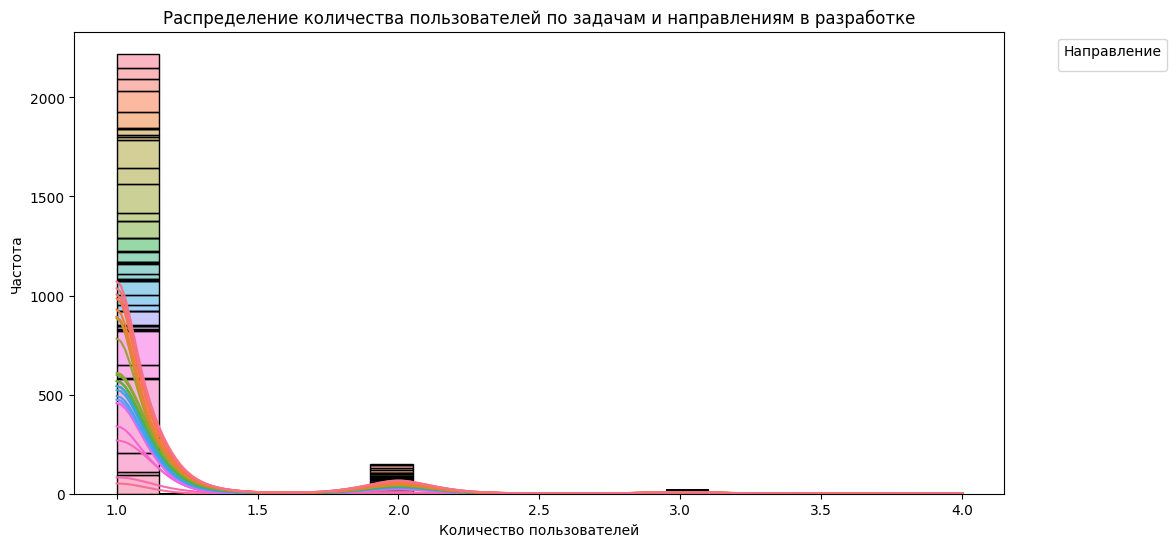

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка данных из файла timelog.csv
df = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Шаг 1: Выделение задач по деятельности "Разработка"
df_development = df[df['Деятельность'] == 'Разработка']

# Шаг 2: Проверка и заполнение направления
df_development['Направление'].fillna(df_development['Проект'], inplace=True)

# Шаг 3: Подсчет количества пользователей для каждой задачи и направления
df_user_count = df_development.groupby(['Деятельность', 'Направление', 'Номер Задачи'])['Пользователь'].nunique().reset_index()

# Шаг 4: Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=df_user_count, x='Пользователь', bins=20, kde=True, hue='Направление', multiple='stack')
plt.title('Распределение количества пользователей по задачам и направлениям в разработке')
plt.xlabel('Количество пользователей')
plt.ylabel('Частота')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\3231742622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['Направление'].fillna(df_development['Проект'], inplace=True)


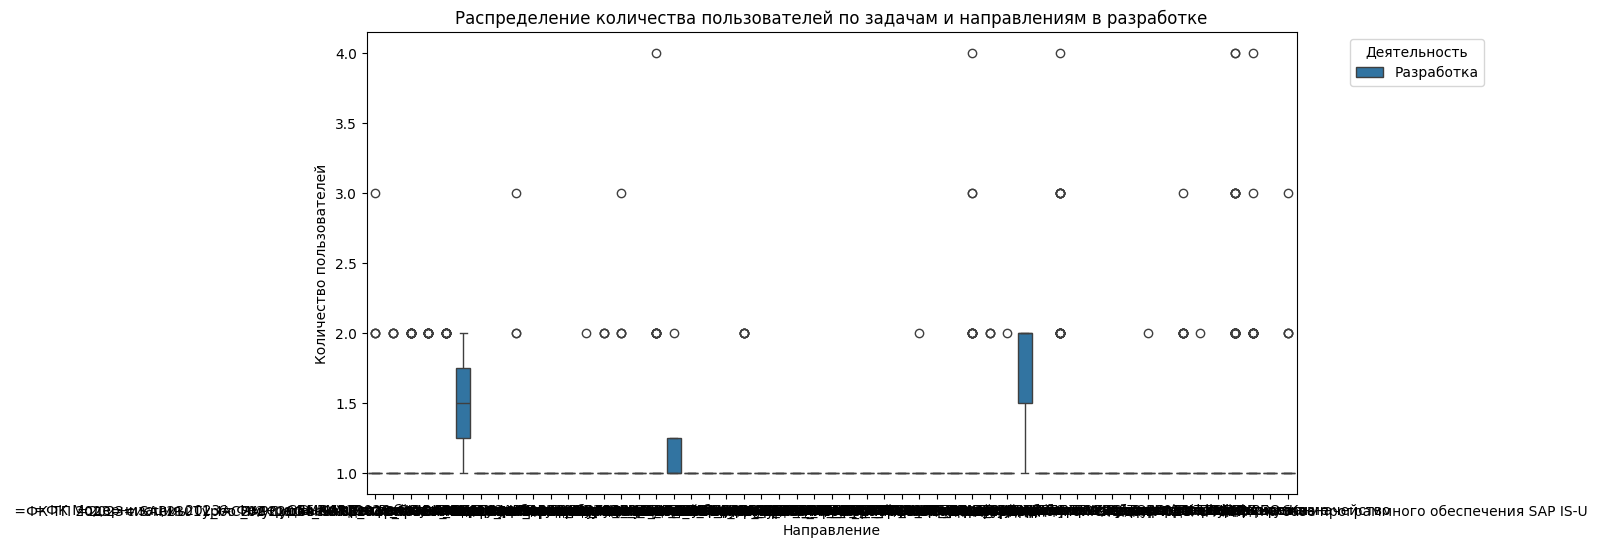

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файла timelog.csv
df = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Шаг 1: Выделение задач по деятельности "Разработка"
df_development = df[df['Деятельность'] == 'Разработка']

# Шаг 2: Проверка и заполнение направления
df_development['Направление'].fillna(df_development['Проект'], inplace=True)

# Шаг 3: Подсчет количества пользователей для каждой задачи и направления
df_user_count = df_development.groupby(['Деятельность', 'Направление', 'Номер Задачи'])['Пользователь'].nunique().reset_index()

# Шаг 4: Построение ящика с усами
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_user_count, x='Направление', y='Пользователь', hue='Деятельность')
plt.title('Распределение количества пользователей по задачам и направлениям в разработке')
plt.xlabel('Направление')
plt.ylabel('Количество пользователей')
plt.legend(title='Деятельность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\97067094.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['Направление'].fillna(df_development['Проект'], inplace=True)
G:\Develop\python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


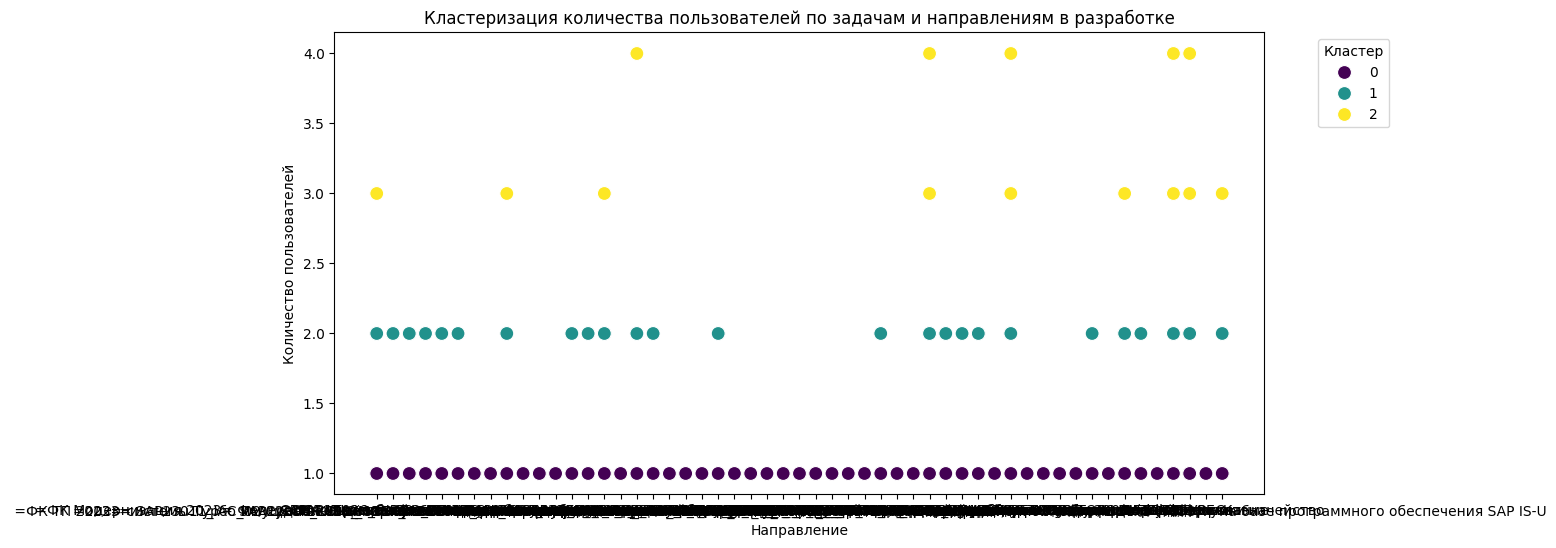

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Шаг 1: Выделение задач по деятельности "Разработка"
df_development = df[df['Деятельность'] == 'Разработка']

# Шаг 2: Проверка и заполнение направления
df_development['Направление'].fillna(df_development['Проект'], inplace=True)

# Шаг 3: Подсчет количества пользователей для каждой задачи и направления
df_user_count = df_development.groupby(['Деятельность', 'Направление', 'Номер Задачи'])['Пользователь'].nunique().reset_index()

# Шаг 4: Выделение признаков для кластеризации
X = df_user_count[['Пользователь']]

# Шаг 5: Кластеризация методом K-средних
kmeans = KMeans(n_clusters=3, random_state=42)
df_user_count['Cluster'] = kmeans.fit_predict(X)

# Шаг 6: Построение графика
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_user_count, x='Направление', y='Пользователь', hue='Cluster', palette='viridis', s=100)
plt.title('Кластеризация количества пользователей по задачам и направлениям в разработке')
plt.xlabel('Направление')
plt.ylabel('Количество пользователей')
plt.legend(title='Кластер', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\2742741775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['Направление'].fillna(df_development['Проект'], inplace=True)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\2742741775.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


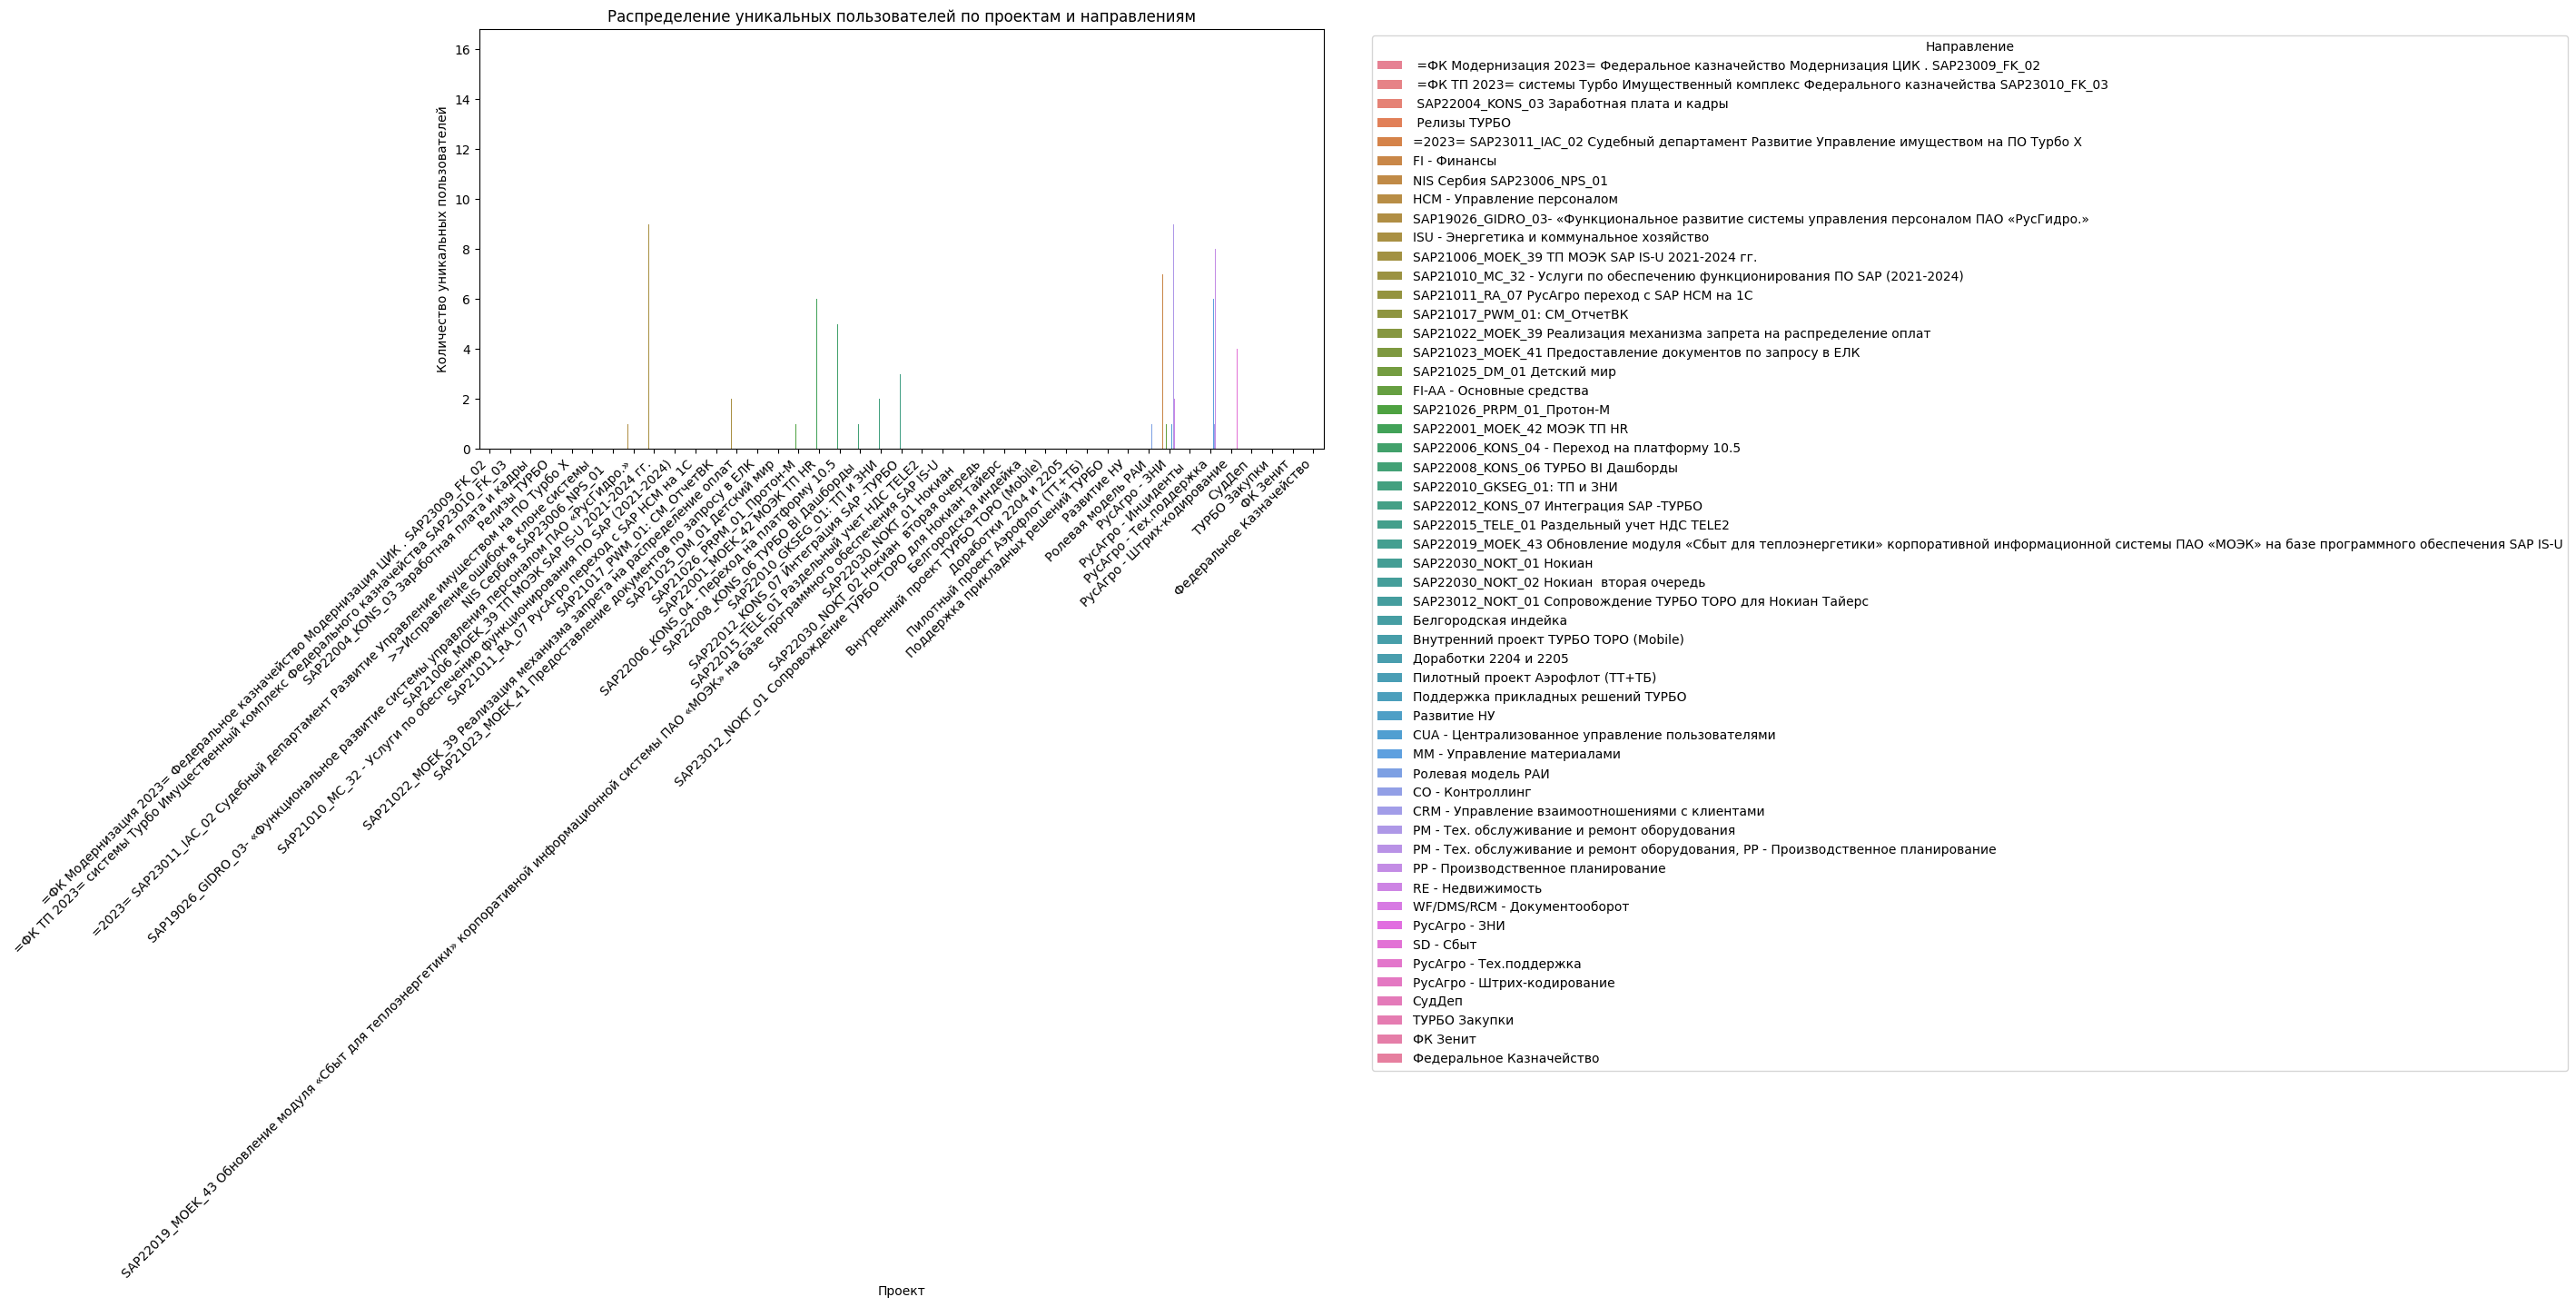

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Заполняем пропуски в столбце "Направление" значениями из столбца "Проект"
df_development['Направление'].fillna(df_development['Проект'], inplace=True)

# Группируем по проекту и направлению, считаем количество уникальных пользователей
grouped_df = df_development.groupby(['Проект', 'Направление'])['Пользователь'].nunique().reset_index()

# Создаем график распределения
plt.figure(figsize=(12, 6))
sns.barplot(x='Проект', y='Пользователь', hue='Направление', data=grouped_df)
plt.title('Распределение уникальных пользователей по проектам и направлениям')
plt.xlabel('Проект')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Отображение графика
plt.show()


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\3907626062.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\3907626062.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')


Трудоемкость задач по проектам и годам:
                                                 Проект  Номер Задачи  Дата  \
0      =ФК Модернизация 2023= Федеральное казначейст...         10341  2023   
1      =ФК Модернизация 2023= Федеральное казначейст...         10344  2023   
2      =ФК Модернизация 2023= Федеральное казначейст...         10345  2023   
3      =ФК Модернизация 2023= Федеральное казначейст...         10346  2023   
4      =ФК Модернизация 2023= Федеральное казначейст...         10347  2023   
...                                                 ...           ...   ...   
2444                           Федеральное Казначейство          9887  2023   
2445                           Федеральное Казначейство         10266  2023   
2446                           Федеральное Казначейство         10302  2023   
2447                           Федеральное Казначейство         10305  2023   
2448                           Федеральное Казначейство         10317  2023   

      count

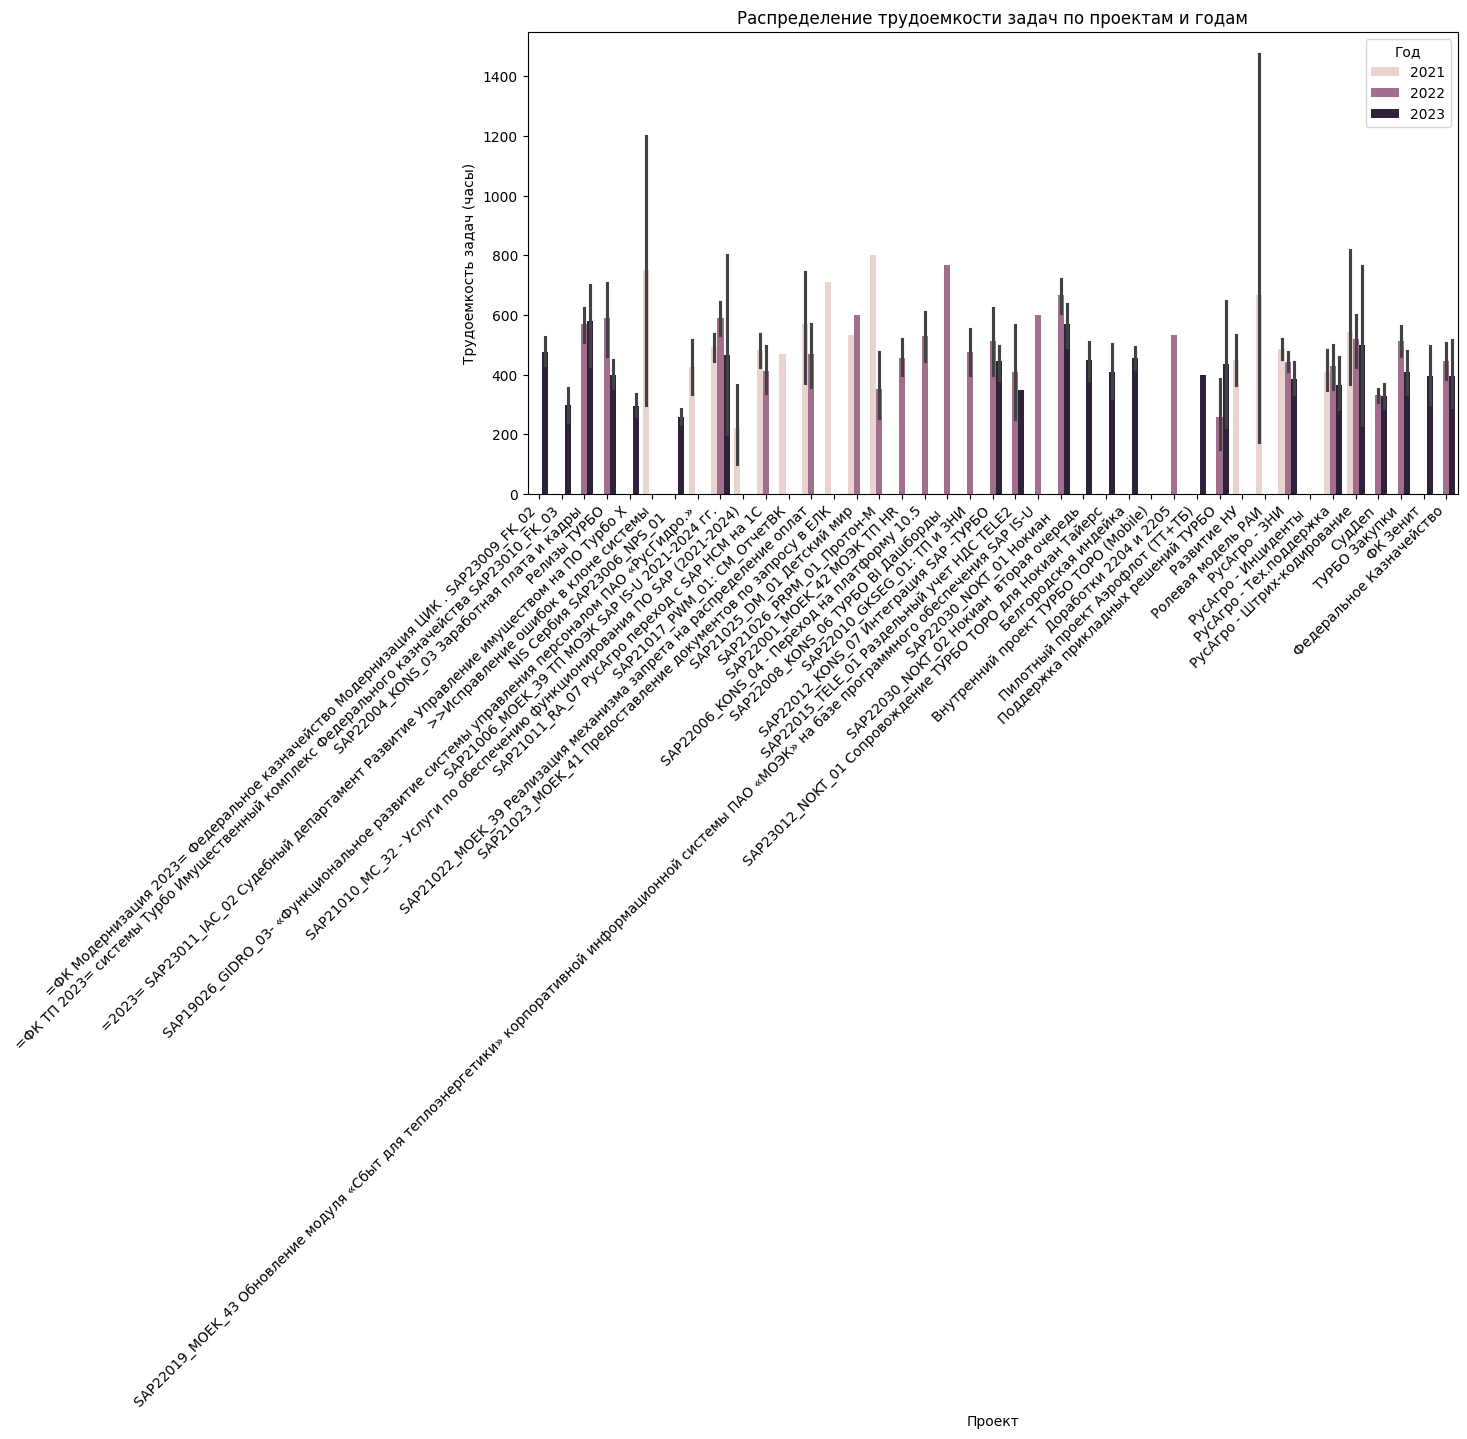

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Проект', 'Номер Задачи', df_development['Дата'].dt.year])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Печать результатов
print("Трудоемкость задач по проектам и годам:")
print(grouped_by_project_df)

# Строим график распределения трудоемкости задач
plt.figure(figsize=(12, 6))
sns.barplot(x='Проект', y='mean', hue='Дата', data=grouped_by_project_df)
plt.title('Распределение трудоемкости задач по проектам и годам')
plt.xlabel('Проект')
plt.ylabel('Трудоемкость задач (часы)')
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи оси x для лучшей видимости
plt.legend(title='Год')
plt.show()




C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\2573105142.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\2573105142.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_1060\2573105142.py:1

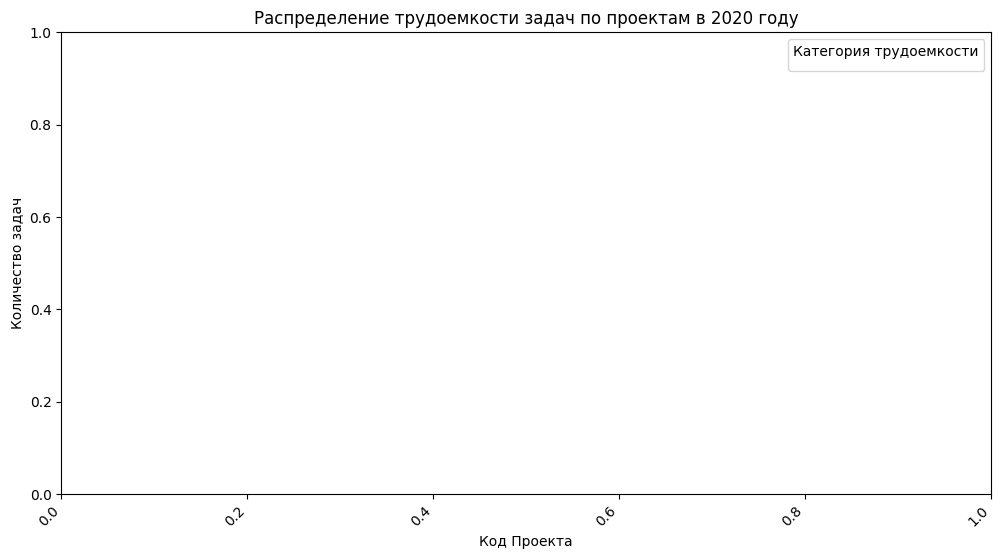

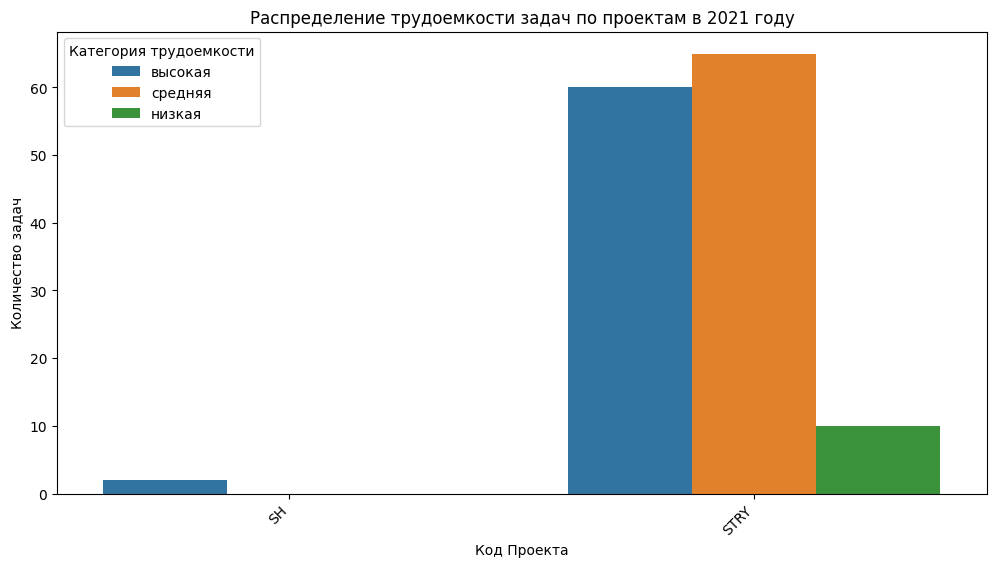

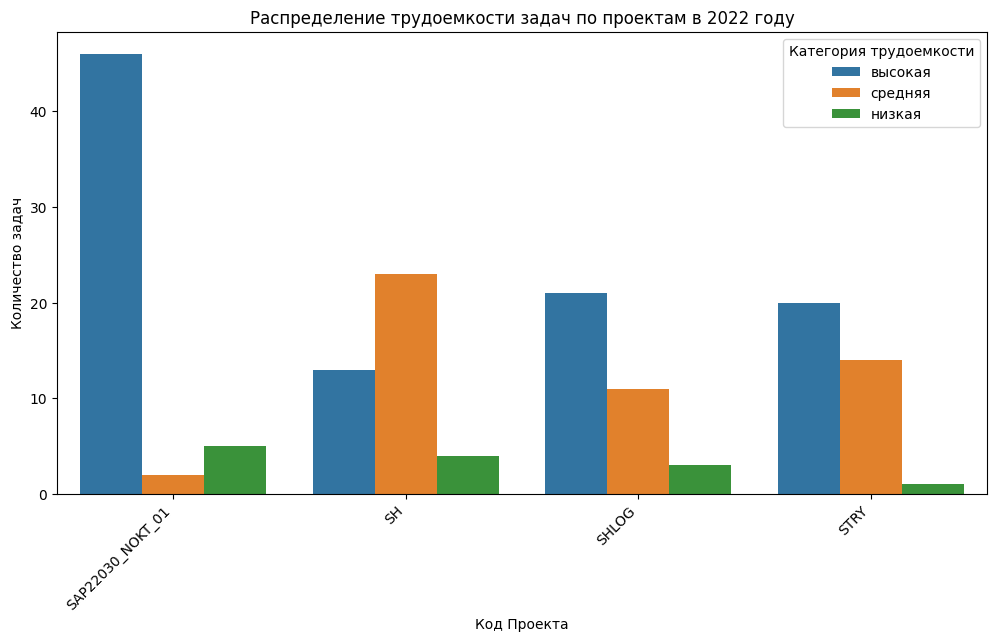

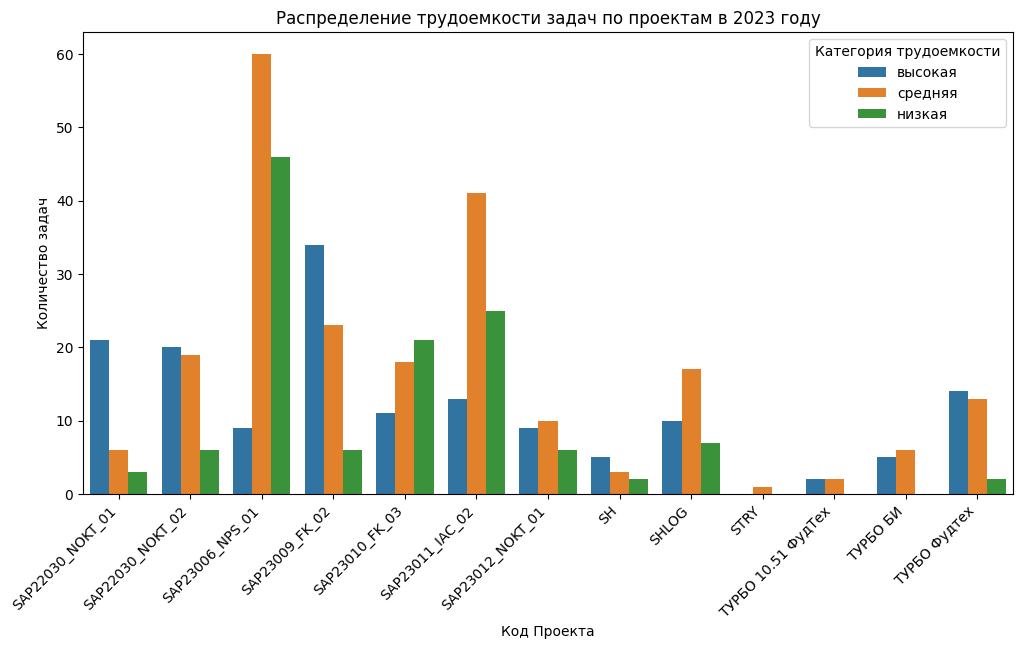

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Создаем столбец с годом
df_development['Год'] = df_development['Дата'].dt.year

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Код Проекта', 'Номер Задачи', 'Год'])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Добавляем категории трудоемкости
def categorize_workload(hours):
    if hours > 500 and hours < 1500:
        return 'высокая'
    elif hours < 200:
        return 'низкая'
    elif hours < 500 and hours > 200:
        return 'средняя'
    else:
        return

grouped_by_project_df['Категория трудоемкости'] = grouped_by_project_df['mean'].apply(categorize_workload)

# Строим график распределения трудоемкости задач для каждого года
for year in range(2020, 2024):
    # Отфильтруем данные по году
    filtered_df = grouped_by_project_df[grouped_by_project_df['Год'] == year]

    # Строим график распределения трудоемкости задач
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Код Проекта', hue='Категория трудоемкости', data=filtered_df)
    plt.title(f'Распределение трудоемкости задач по проектам в {year} году')
    plt.xlabel('Код Проекта')
    plt.ylabel('Количество задач')
    plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи оси x для лучшей видимости
    plt.legend(title='Категория трудоемкости')
        # Отображение графика
    #plt.show
    plt.savefig('категория_boxplot_by_'+str(year)+'.png', dpi=300, bbox_inches='tight')

C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_6828\982000169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tasks['час(а,ов)'] =  pd.to_numeric(selected_tasks['час(а,ов)'].str.replace(',', ''), errors='coerce')
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_6828\982000169.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tasks['Дата'] = pd.to_datetime(selected_tasks['Дата'], format='%d.%m.%Y')
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_6828\982000169.py:25: SettingWithC

           Код Проекта  час(а,ов)  Дата  Cluster
5     SAP22030_NOKT_02        250   415        2
18    SAP22030_NOKT_02         50   415        2
73    SAP22030_NOKT_02        200   407        2
81    SAP22030_NOKT_02        400   407        2
82    SAP22030_NOKT_02        200   407        2
...                ...        ...   ...      ...
6218  SAP22030_NOKT_01        800     1        1
6232  SAP22030_NOKT_01        800     0        1
6234  SAP22030_NOKT_01        800     0        1
6235  SAP22030_NOKT_01        400     0        0
6236  SAP22030_NOKT_01        800     0        1

[1366 rows x 4 columns]


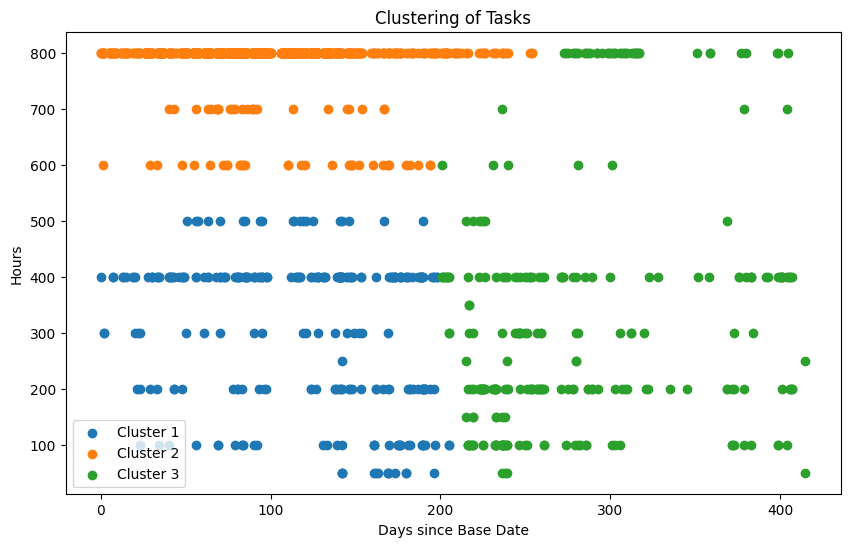

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime  # Добавим импорт datetime
import matplotlib.pyplot as plt

# Загрузка данных (предположим, что у вас есть DataFrame df с информацией о задачах)
# Пример данных:
df =  pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи из указанных проектов
selected_projects = ['SAP22030_NOKT_01', 'SAP22030_NOKT_02', 'SAP23012_NOKT_01']
selected_tasks = df[df['Код Проекта'].isin(selected_projects)]

# Исправление формата столбца 'час(а,ов)'
selected_tasks['час(а,ов)'] =  pd.to_numeric(selected_tasks['час(а,ов)'].str.replace(',', ''), errors='coerce')
# Преобразование столбца 'Дата' в числовой формат (например, в количество дней с начала 2020 года)
base_date = datetime(2020, 1, 1)
selected_tasks['Дата'] = pd.to_datetime(selected_tasks['Дата'], format='%d.%m.%Y')

# Define a base date for numerical representation
base_date = selected_tasks['Дата'].min()

# Convert 'Дата' to numerical representation (days since the base date)
selected_tasks['Дата'] = (selected_tasks['Дата'] - base_date).dt.days

# Handle missing values in 'час(а,ов)'
selected_tasks['час(а,ов)'].fillna(0, inplace=True)
# Выбираем характеристики для кластеризации (например, количество часов, дата и другие признаки)
features = selected_tasks[['час(а,ов)', 'Дата']]

# Масштабирование данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Определение числа кластеров (можно использовать, например, метод локтя)
# kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# elbow_method = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(scaled_features)
#     elbow_method.append(kmeans.inertia_)

# ... выбор оптимального числа кластеров ...

# Пример, предположим, что оптимальное число кластеров - 3
optimal_clusters = 3

# Обучение модели K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
selected_tasks['Cluster'] = kmeans.fit_predict(scaled_features)

# Вывод результатов
print(selected_tasks[['Код Проекта', 'час(а,ов)', 'Дата', 'Cluster']])

# Plot the clustered tasks
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_tasks = selected_tasks[selected_tasks['Cluster'] == cluster]
    plt.scatter(cluster_tasks['Дата'], cluster_tasks['час(а,ов)'], label=f'Cluster {cluster + 1}')

plt.title('Clustering of Tasks')
plt.xlabel('Days since Base Date')
plt.ylabel('Hours')
plt.legend()
plt.show()

ValueError: time data "415" doesn't match format "%d.%m.%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.